In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import beta
import seaborn as sns

#### Visualize the scaled beta distribution for an artist + event combo at a given snapshot $T$

The Jacobian scaled Beta distribution is given by:
$$
f(x; \alpha_i, \beta_i, \text{Min}_i, \text{Max}_i) = 
$$

$$
\frac{(x - \text{Min}_i)^{\alpha_i  
- 1} (\text{Max}_i - x)^{\beta_i - 1}}{(\text{Max}_i - \text{Min}_i)^{\alpha_i + \beta_i  
- 1} B(\alpha_i, \beta_i)},
$$

##### Composite Quantile and Moment Matching

$$
\mu_i = \text{Min}_i + \frac{\alpha_i}{\alpha_i + \beta_i} (\text{Max}_i -  
\text{Min}_i),
$$

$$
\tilde{\mu}_i \approx \text{Min}_i + (\text{Max}_i - \text{Min}_i) \left(  
\frac{\alpha_i - \frac{1}{3}}{\alpha_i + \beta_i - \frac{2}{3}}\right).
$$

We first scale the mean and median to the standard interval $[0, 1]$:

$$
s = \frac{\mu_i - \text{Min}_i}{\text{Max}_i - \text{Min}_i}, \quad m =  
\frac{\tilde{\mu}_i - \text{Min}_i}{\text{Max}_i - \text{Min}_i}.
$$

From the mean equation, we express $\beta_i$ in terms of $\alpha_i$ and the  
scaled mean $s$:

$$
\beta_i = \alpha_i \left( \frac{1 - s}{s} \right).
$$

Substituting this into the equation for the median gives:

$$
m = \frac{\alpha_i - \frac{1}{3}}{\frac{\alpha_i}{s} - \frac{2}{3}},
$$

which simplifies to:

$$
\alpha_i = \frac{ s (2 m - 1) }{ 3 ( m - s ) }, \quad \beta_i = \frac{ (1 -  
s)(2 m - 1) }{ 3 ( m - s ) }.
$$

In [2]:
def load_df_from_file(verbose=True):
    """
    Load the raw dataset with minor modifications.
    """
    file_path = './event_labels_1_18_2025_last_N_days.csv'
    data = pd.read_csv(file_path)
    
    if verbose:
        print(f"Number of unique artists: {len(data.act.unique())}")
    
    # Replace inf and -inf with NaN, then drop NaNs
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    
    return data

In [3]:
# # Load and filter data
# df = load_df_from_file(verbose=False)

# # Select an event id to view its time series data
# print(list(df.event_id.unique())[0:50])

# print(list(df.act.unique())[0:150])

# a = df[df.act == 'Buddy Guy']
# print(list(a.event_id.unique())[0:50])

,date,act,average_price,median_price,lowest_price,highest_price,alpha,beta,event_id
566,2023-10-03 20:00:00,Buddy Guy,596.0,561.214286,287.785714,1100.928571,0.96719,1.584487,563


Buddy Guy - 2023-10-03 20:00:00 - Scaled Beta Distribution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


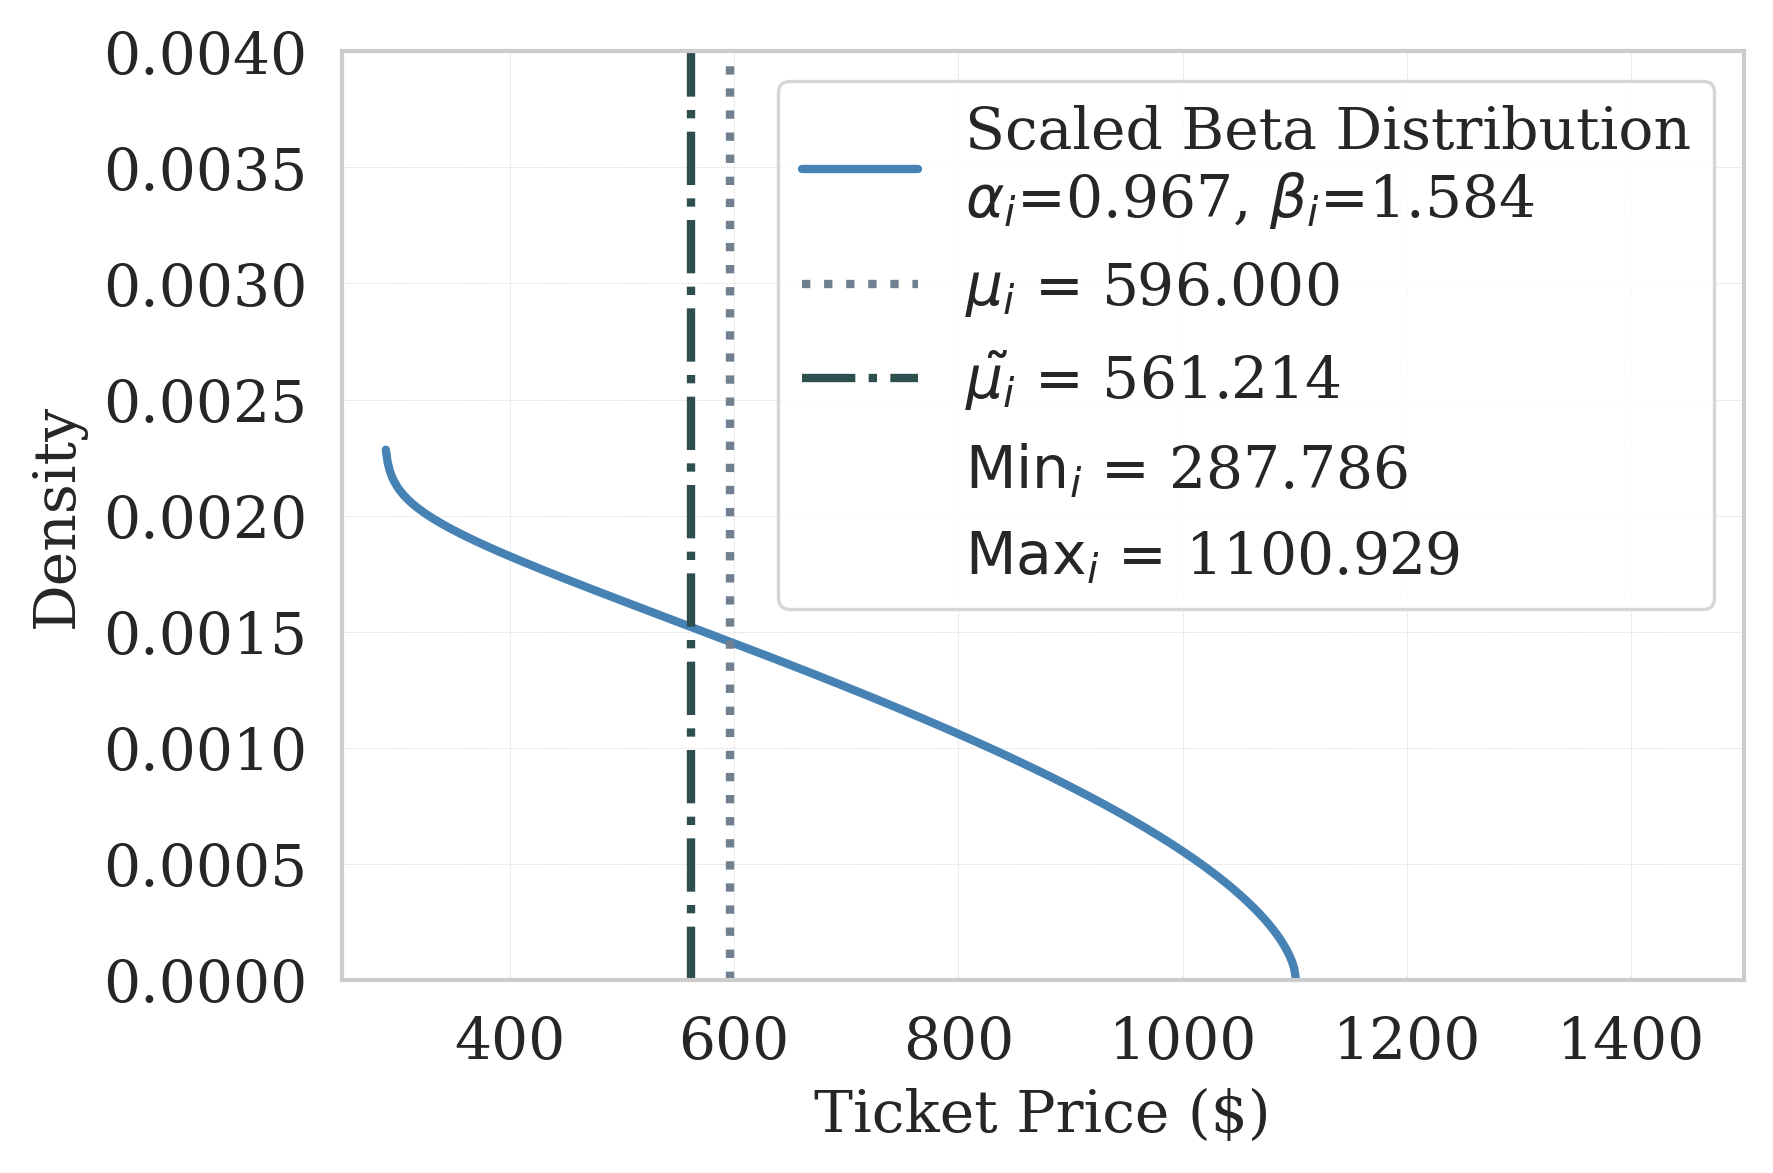

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from scipy.stats import beta
import seaborn as sns

sns.set(style="whitegrid", context="paper")

#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
# Use Type 1 fonts in PDFs and set serif fonts for consistency
rcParams['pdf.use14corefonts'] = True  
#plt.rc('text', usetex=True)  # Enable LaTeX for text rendering
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
plt.rc('font', family='serif')
#plt.rc('font', serif=['Computer Modern Roman'])

# Set plot style for a professional look
fsize = 14

#plt.rc('text', usetex=True) # This seems to toggle the font style, unfortunately

# Define blue-gray color palette
colors = {
    'pdf': '#4682B4',        # Steel Blue
    'mean_line': '#708090',  # Slate Gray
    'median_line': '#2F4F4F' # Dark Slate Gray
}

# Load and filter data
df = load_df_from_file(verbose=False)
df = df[df.event_id == 563]
display(df)

# Extract parameters
mean = df.average_price.iloc[0]
median = df.median_price.iloc[0]
min_value = df.lowest_price.iloc[0]
max_value = df.highest_price.iloc[0]
alpha = df.alpha.iloc[0]
beta_value = df.beta.iloc[0]

# Scale x values to [0, 1]
x = np.linspace(min_value, max_value, 500)
scale_factor = max_value - min_value
x_scaled = (x - min_value) / scale_factor

# Ensure alpha and beta are positive
alpha = max(alpha, 0.001)
beta_value = max(beta_value, 0.001)

# Calculate the beta distribution PDF
pdf = beta.pdf(x_scaled, alpha, beta_value) / scale_factor

# Plotting
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
#plt.rc('text', usetex=False) # This seems to toggle the font style, unfortunately
#plt.rc('text', usetex=True)

# Beta PDF plot
ax.plot(
    x, pdf, color="steelblue", linestyle='-',
    label=f"Scaled Beta Distribution\n" + fr"$\alpha_i$={alpha:.3f}, $\beta_i$={beta_value:.3f}",
    linewidth=2
)

# Mean and median lines
ax.axvline(
    mean, color=colors['mean_line'], linestyle=':',
    label=fr"$\mu_i$ = {mean:.3f}", linewidth=2
)
ax.axvline(
    median, color=colors['median_line'], linestyle='-.',
    label=fr"$\tilde{{\mu_i}}$ = {median:.3f}", linewidth=2
)

# Add dummy entries for Min and Max to the legend
ax.plot([], [], ' ', label=fr"$\mathrm{{Min}}_i$ = {min_value:.3f}")
ax.plot([], [], ' ', label=fr"$\mathrm{{Max}}_i$ = {max_value:.3f}")

# Set titles and labels
print(f"{df.act.iloc[0]} - {df.date.iloc[0]} - Scaled Beta Distribution")
ax.set_xlabel("Ticket Price (\$)", fontsize=fsize)
ax.set_ylabel("Density", fontsize=fsize)

# Legend in upper right
legend = plt.legend(
    fontsize=fsize,
    facecolor='white',
    frameon=True,
    loc='upper right',
    prop={'family': 'serif', 'size': fsize}
)

# Subtle grid styling
plt.grid(True, which='both', linestyle='--', linewidth=0.125, alpha=1)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.ylim(0, .0040)
plt.xlim(250, 1500)

# Adjust layout and save figure
plt.tight_layout()
plt.savefig(
    'beta_distribution_plot.eps',
    format='eps',
    dpi=300,
    bbox_inches='tight'
)
plt.show()